In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations_JB import *
from proj1_helpers import *
%load_ext autoreload
%autoreload 2

The code below is to prepare the data before making any regression on it
We first split it in 4 batches according to the value of the feature PRI_jet_num
Then we remove unusual features ( value -999) if needed
To optimize the regression on the angles, we split those kinf of feature in 2 by using cosinus and sinus

In [120]:
def feature0_split(yb, input_data, ids):
    """
    Splitting the data according to the first feature (if its undefined or not)
    """
    feature0 = input_data[:,0]
    mask = np.where(feature0==-999,False,True)
    return yb[mask], input_data[mask], ids[mask], yb[np.invert(mask)], input_data[np.invert(mask)], ids[np.invert(mask)]

def features_split(yb, input_data, ids):
    """
    Splitting the data according to the value of PRI_jet_num
    """
    
    mask_0 = (input_data[:,22] == 0)
    mask_1 = (input_data[:,22] == 1)
    mask_2 = (input_data[:,22] == 2)
    mask_3 = (input_data[:,22] == 3)

    
    return yb[mask_0], yb[mask_1], yb[mask_2], yb[mask_3], \
input_data[mask_0], input_data[mask_1], input_data[mask_2], input_data[mask_3], \
ids[mask_0], ids[mask_1], ids[mask_2], ids[mask_3]

def remove_features_0(input_data_0):
    """
    Remove the useless features if the jet num feature is equal to 0
    """
    useless_features_index = [4, 5, 6, 12,22, 23, 24, 25 , 26, 27, 28,29,33,34]# , 30, 33]
    
    mask = np.ones(int(input_data_0.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return input_data_0[:,mask]


def remove_features_1(input_data_1):
    """
    Remove the useless features if the jet num feature is equal to 1
    """
    print input_data.shape
    useless_features_index = [4, 5, 6, 12,22, 26, 27, 28,34]#, 30, 33]
    # feature 31 : toujours la meme valeur ?
    mask = np.ones(int(input_data_1.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return input_data_1[:,mask]
    
    # No need for jet_num equal to 2 or 3 : all the features are kept   

def angle_features_processing(data_path):
    """
    We want to change all the features representing an angle into two features
    one for cosinus of the angle and another for sinus of the angle.
    """
    
    yb, input_data, ids = load_csv_data(data_path,sub_sample = False)

    angle_features = [15, 18, 20, 25, 28]
    
    new_data = np.zeros((input_data.shape[0], input_data.shape[1] + len(angle_features) ))
    
    for k in range(input_data.shape[1]):
        if k not in angle_features:
            new_data[:, k] = input_data[:, k]
        
    for idx, column in enumerate(angle_features): 
        
        new_data[:, column] = np.cos(input_data[:, column])
        new_data[:, input_data.shape[1] + idx] = np.sin(input_data[:, column])
    
    return yb, new_data, ids

def preparing_features(train_path, test_path):
    
    """ 
    Returns 2 arrays :
    The first one contains the splitted train data
    The second one contains the splitted test data
    """
    
    yb, input_data, ids =  angle_features_processing("train.csv")
    ybt, input_datat, idst = angle_features_processing("test.csv")
    
    yb_def_feat0, input_data_def_feat0, ids_def_feat0, yb_undef_feat0, input_data_undef_feat0, ids_undef_feat0 = feature0_split(yb, input_data, ids)
    ybt_def_feat0, input_datat_def_feat0, idst_def_feat0, ybt_undef_feat0, input_datat_undef_feat0, idst_undef_feat0 = feature0_split(ybt, input_datat, idst)
    
    yb0, yb1, yb2, yb3, data0, data1, data2, data3, ids0, ids1, ids2, ids3 = features_split(yb_def_feat0, input_data_def_feat0, ids_def_feat0)
    yb0_u, yb1_u, yb2_u, yb3_u, data0_u, data1_u, data2_u, data3_u, ids0_u, ids1_u, ids2_u, ids3_u = features_split(yb_undef_feat0, input_data_undef_feat0, ids_undef_feat0)
    yb0t, yb1t, yb2t, yb3t, data0t, data1t, data2t, data3t, ids0t, ids1t, ids2t, ids3t = features_split(ybt_def_feat0, input_datat_def_feat0, idst_def_feat0)
    yb0t_u, yb1t_u, yb2t_u, yb3t_u, data0t_u, data1t_u, data2t_u, data3t_u, ids0t_u, ids1t_u, ids2t_u, ids3t_u = features_split(ybt_undef_feat0, input_datat_undef_feat0, idst_undef_feat0)
    
    data0, data1, data0_u, data1_u = remove_features_0(data0), remove_features_1(data1), remove_features_0(data0_u), remove_features_1(data1_u)
    data0t, data1t, data0t_u, data1t_u = remove_features_0(data0t), remove_features_1(data1t), remove_features_0(data0t_u), remove_features_1(data1t_u)

    data0, data1, data2, data3 = standardize(data0), standardize(data1), standardize(data2), standardize(data3)
    data0t, data1t, data2t, data3t = standardize(data0t), standardize(data1t), standardize(data2t), standardize(data3t)
    
    return np.array([yb0, yb1, yb2, yb3,yb0_u, yb1_u, yb2_u, yb3_u, data0, data1, data2, data3, data0_u, data1_u, data2_u, data3_u, ids0, ids1, ids2, ids3, ids0_u, ids1_u, ids2_u, ids3_u]), np.array([yb0t, yb1t, yb2t, yb3t, yb0t_u, yb1t_u, yb2t_u, yb3t_u, data0t, data1t, data2t, data3t, data0t_u, data1t_u, data2t_u, data3t_u, ids0t, ids1t, ids2t, ids3t, ids0t_u, ids1t_u, ids2t_u, ids3t_u])

In [121]:
train_array, test_array = preparing_features("train.csv", "test.csv")

(250000L, 35L)
(250000L, 35L)
(250000L, 35L)
(250000L, 35L)


In [22]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

In [25]:
def ridge(yb_test, input_data_test, yb_train, input_data_train,lambda_):
    
    w, train_loss = ridge_regression(yb_train, input_data_train, lambda_)
    
    #w, train_loss = least_squares_GD_adapt_step(yb_train, input_data_train, 0*np.random.rand(int(input_data_train.shape[1])), 1000, 0.00000000001,computeLoss = True);
    
    test_loss = compute_loss(yb_test, input_data_test, w)
    y_pred = predict_labels(w, input_data_test)
    return w, train_loss, test_loss, y_pred 

-2.268781354768916e-16
0.9999999999999505


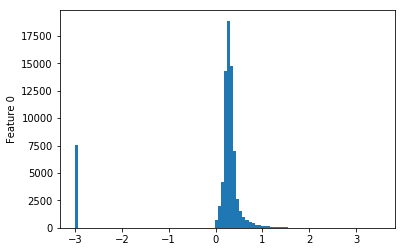

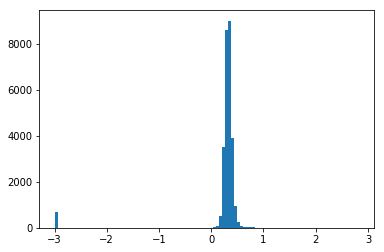

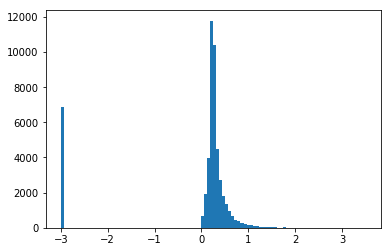

-7.641743079307886e-15
0.9999999999999939


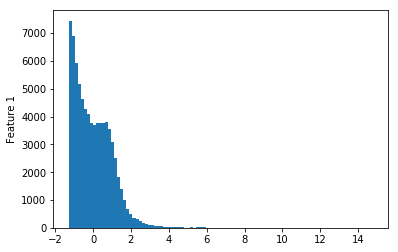

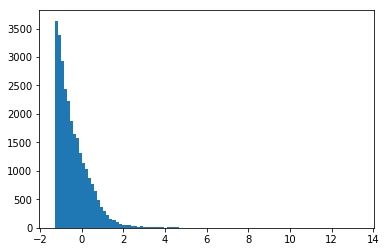

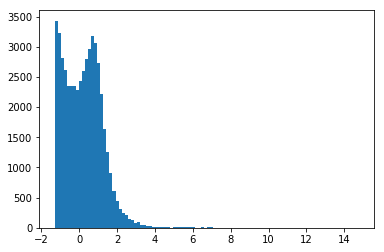

5.000069732485978e-16
0.9999999999999977


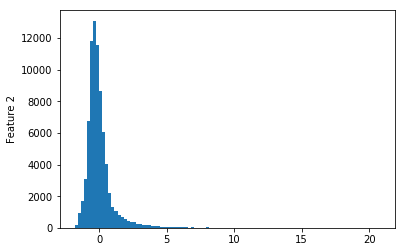

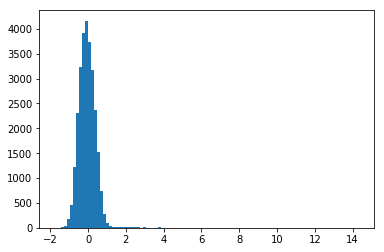

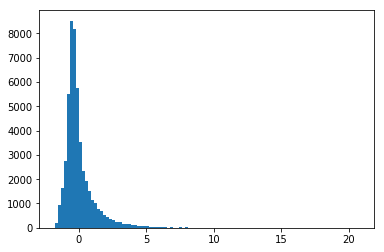

-3.885333885497236e-15
0.9999999999999973


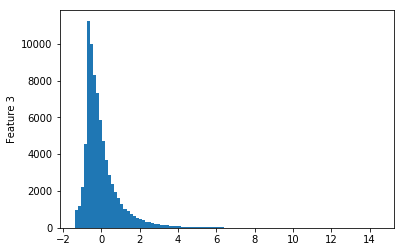

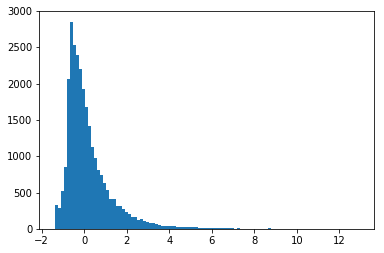

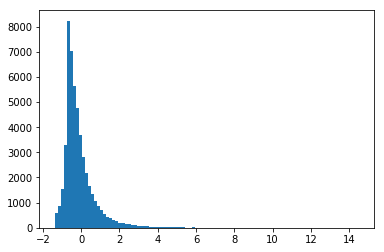

0.0
0.0


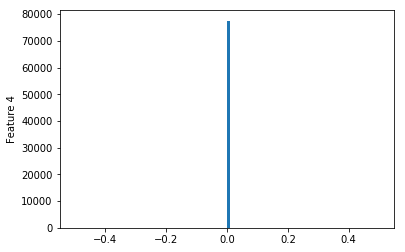

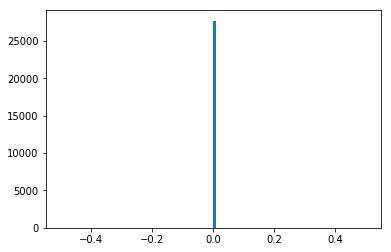

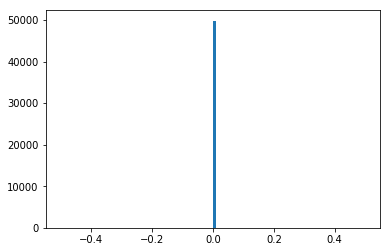

0.0
0.0


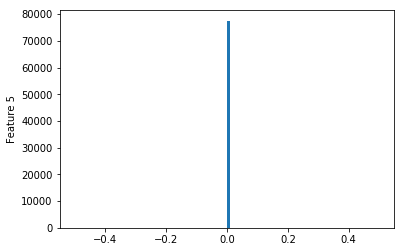

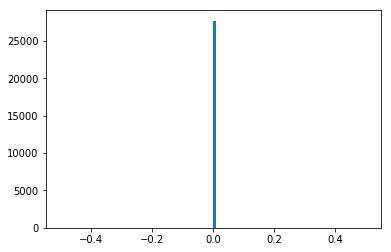

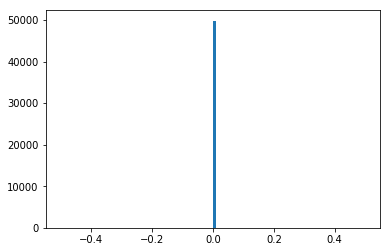

0.0
0.0


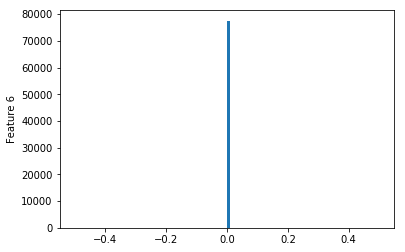

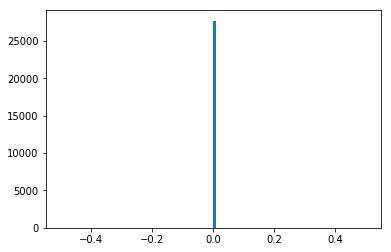

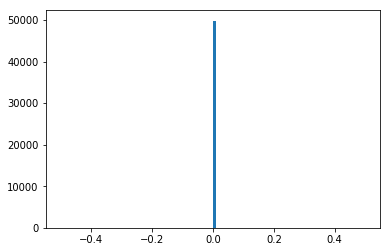

-1.1650503801835565e-14
1.0000000000000149


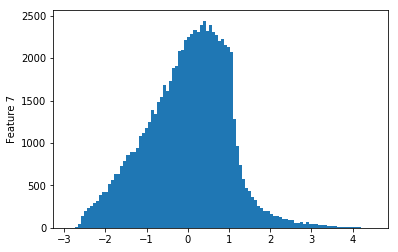

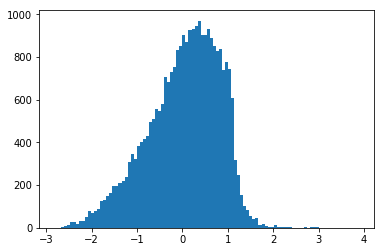

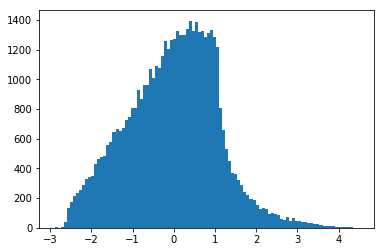

6.730748562784762e-16
0.9999999999999861


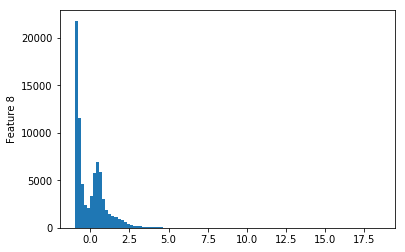

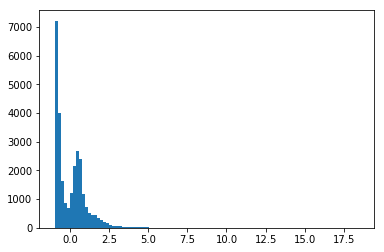

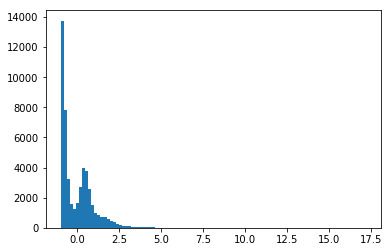

-1.1373228665344015e-15
0.9999999999999952


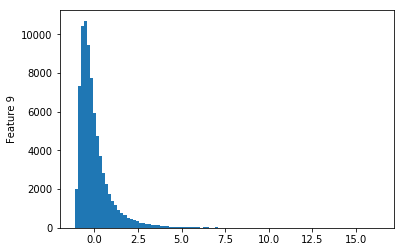

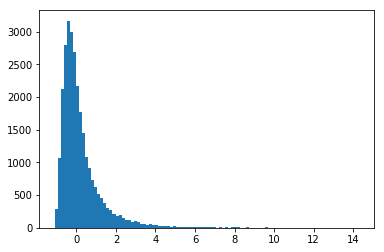

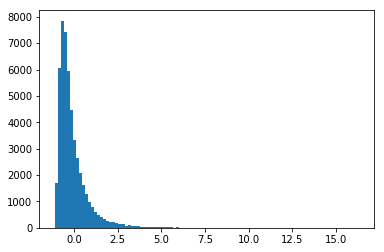

-1.112839087132372e-14
1.0000000000000175


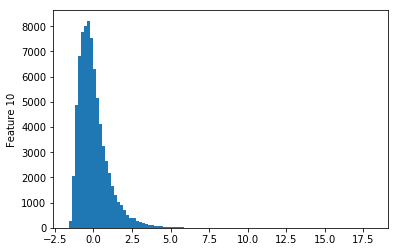

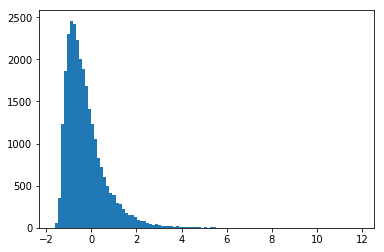

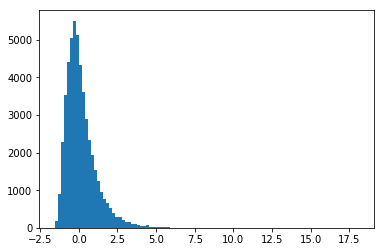

-4.265418904058685e-15
0.9999999999999768


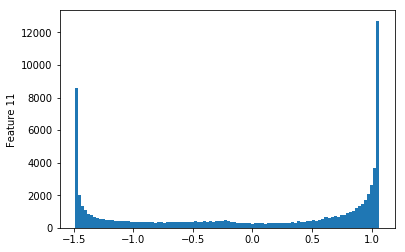

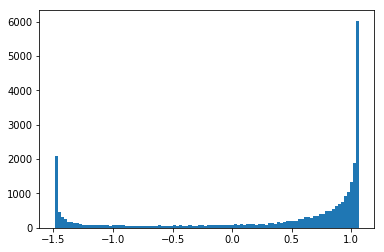

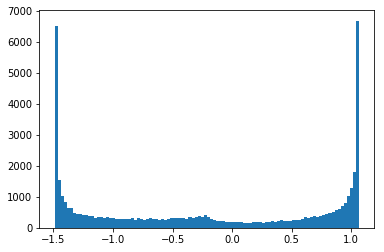

0.0
0.0


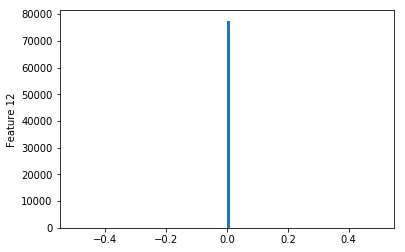

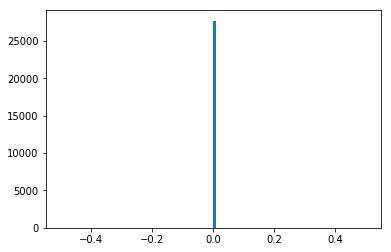

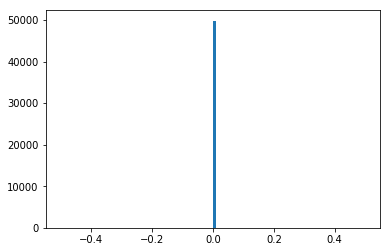

-6.860589563580705e-15
0.9999999999999867


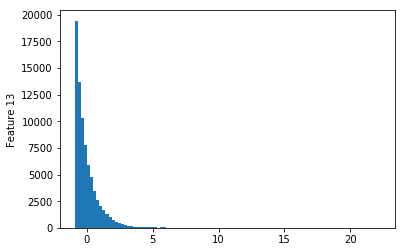

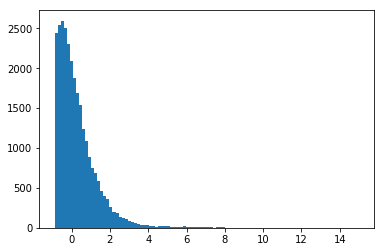

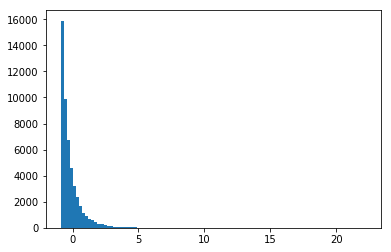

-4.1692064475761577e-17
1.0000000000000007


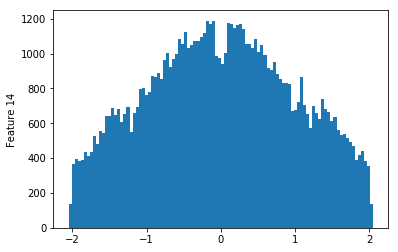

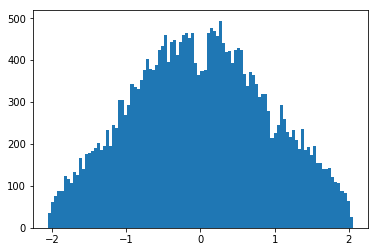

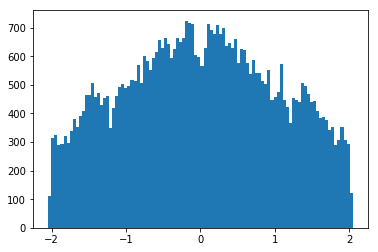

1.2278542065389123e-17
0.9999999999999993


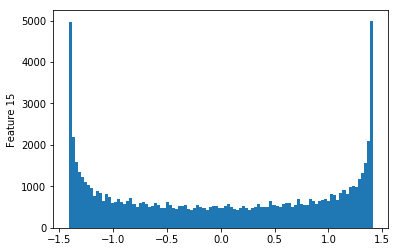

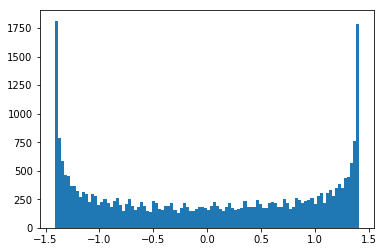

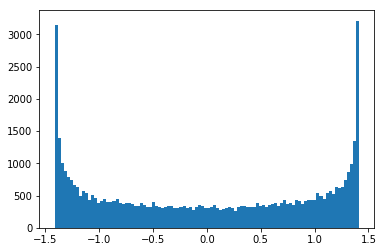

-1.796515639806113e-14
0.9999999999999949


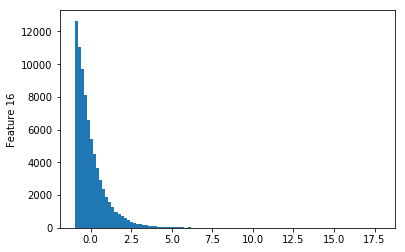

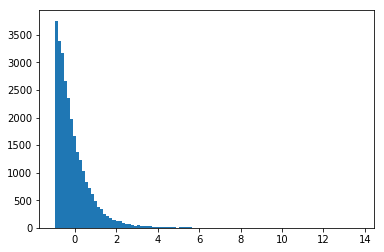

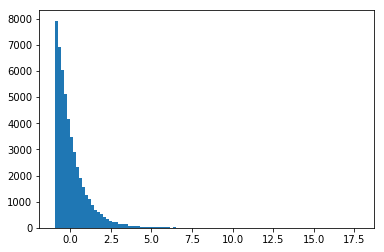

2.1533264069898835e-18
1.0000000000000047


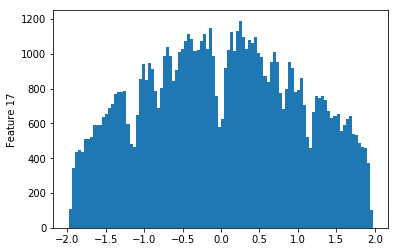

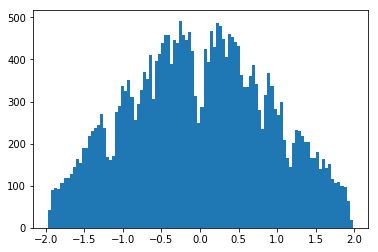

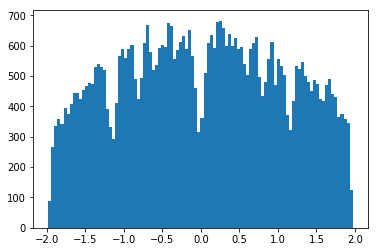

-2.9001183311161627e-17
0.9999999999999943


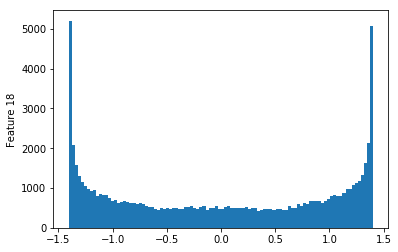

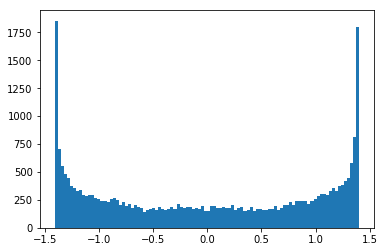

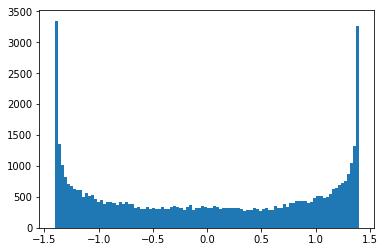

1.4687885237533466e-14
0.9999999999999966


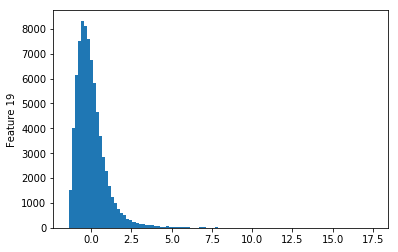

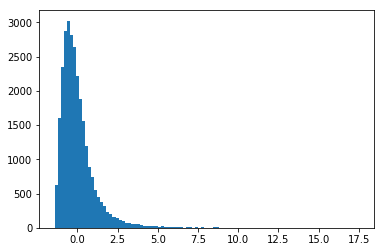

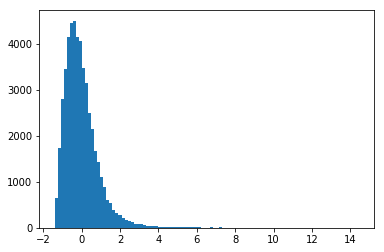

-3.9218029880496604e-17
0.9999999999999989


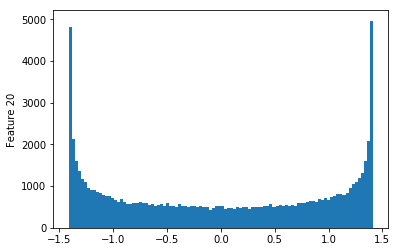

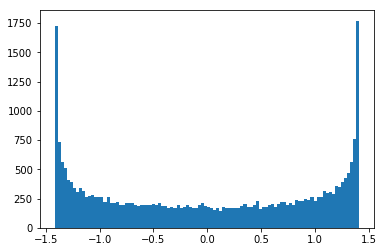

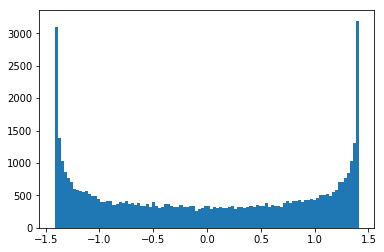

-1.9895178275100618e-14
1.000000000000007


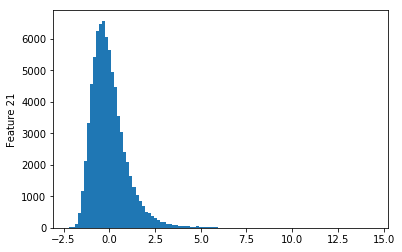

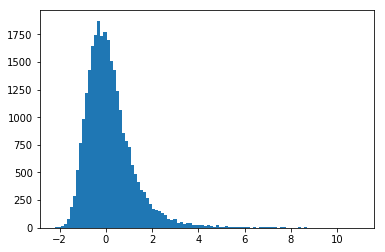

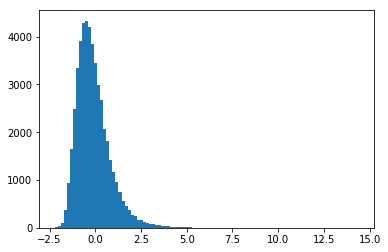

0.0
0.0


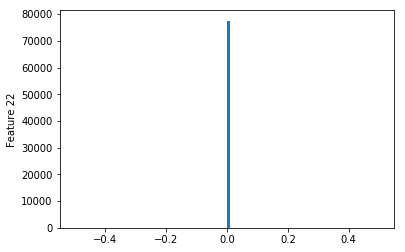

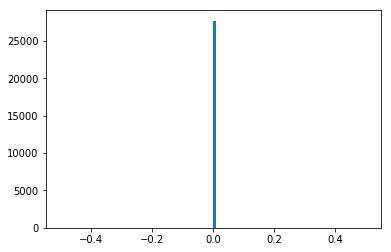

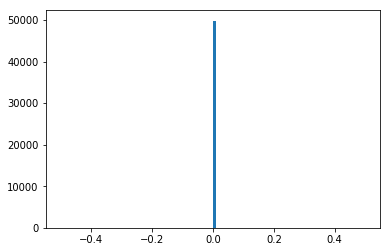

-5.526260238534464e-15
1.000000000000005


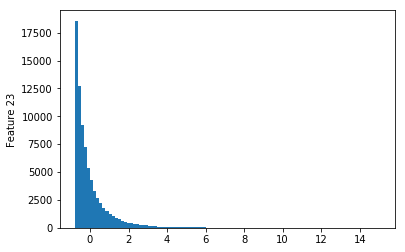

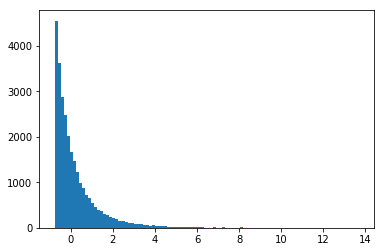

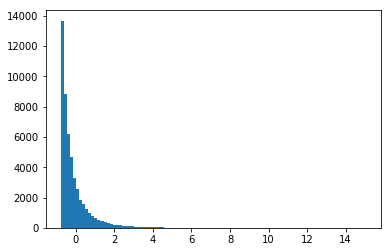

3.083380152987642e-17
1.0000000000000109


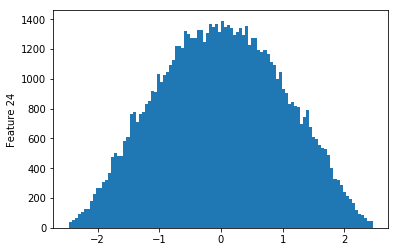

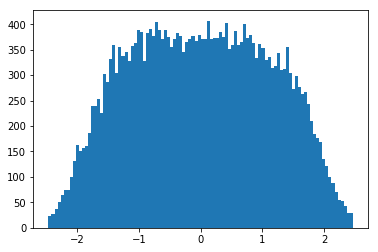

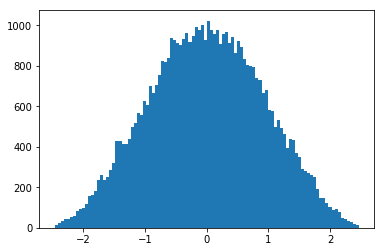

5.497854656144384e-18
1.0000000000000144


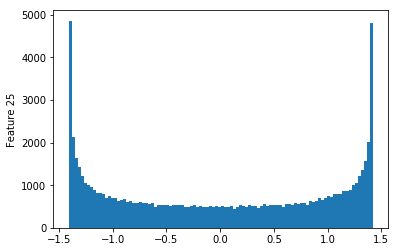

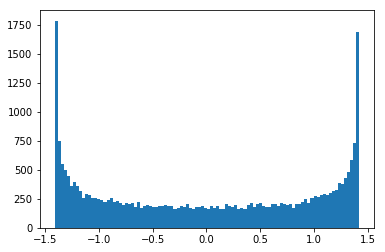

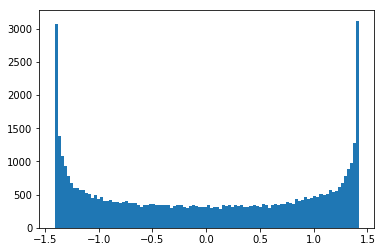

0.0
0.0


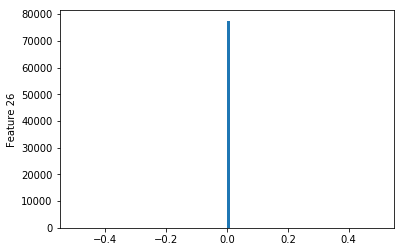

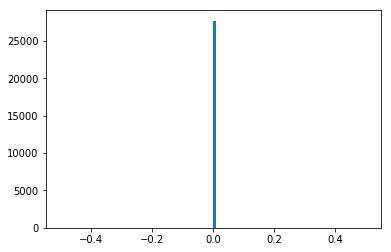

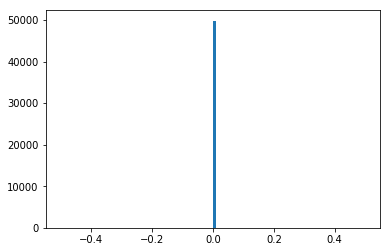

0.0
0.0


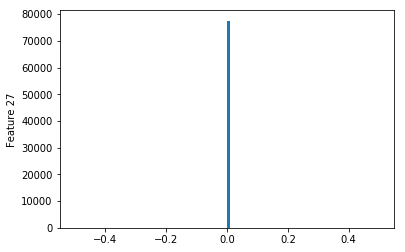

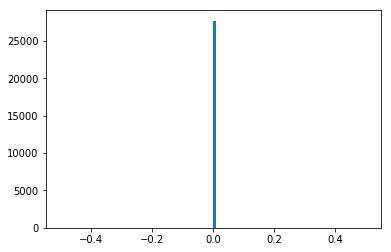

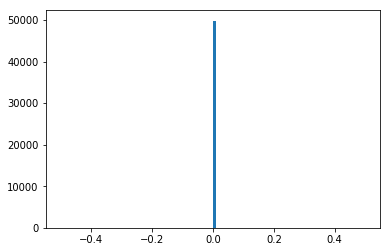

8.021361352916756e-13
0.0


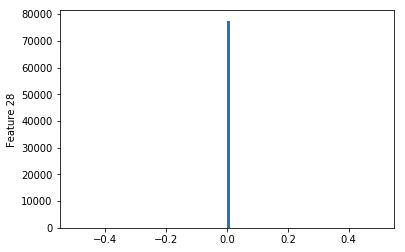

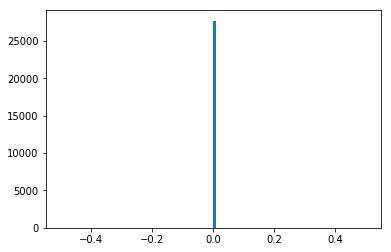

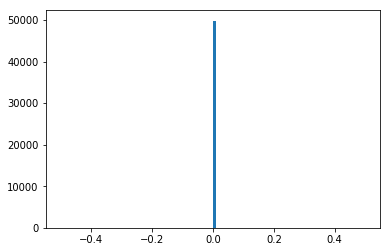

-5.731330217208649e-15
1.0000000000000007


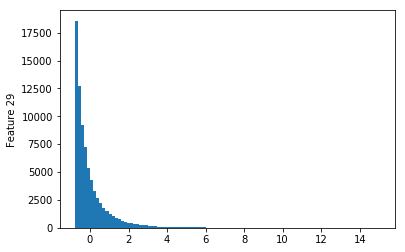

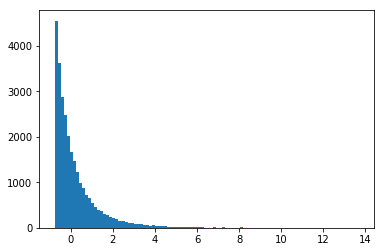

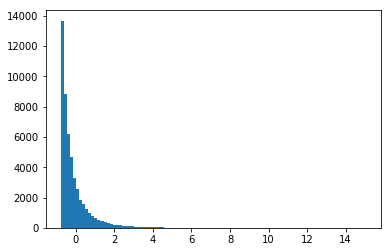

1.11606449519731e-16
0.9999999999999986


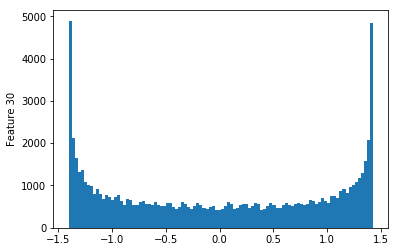

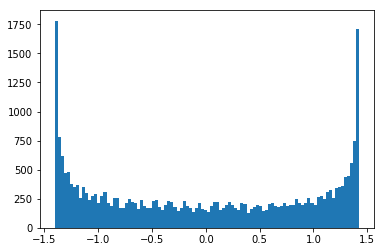

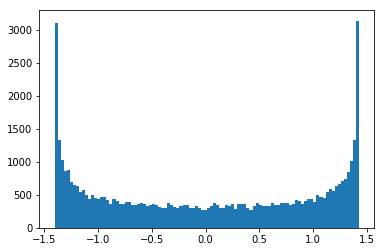

-9.795344379030578e-17
0.9999999999999868


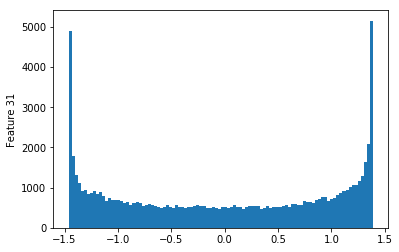

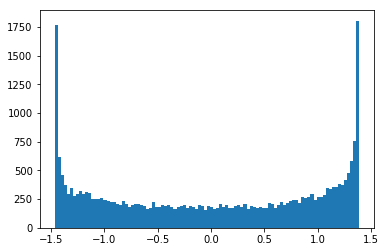

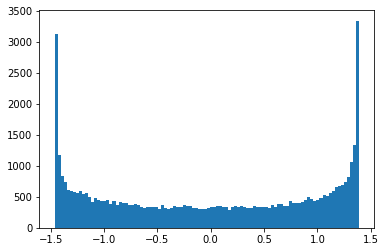

5.802527435005718e-17
1.0000000000000027


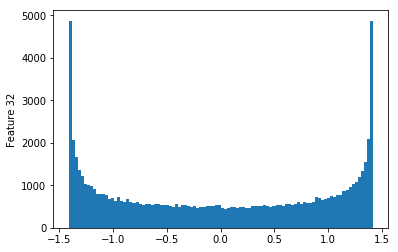

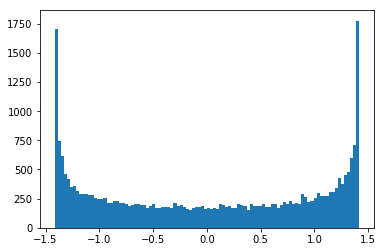

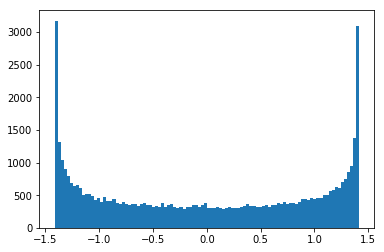

-1.0198520387147833e-16
1.000000000000002


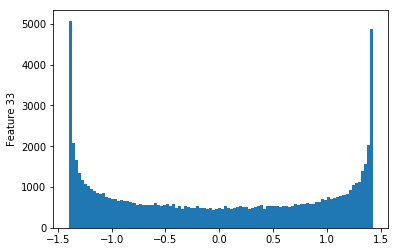

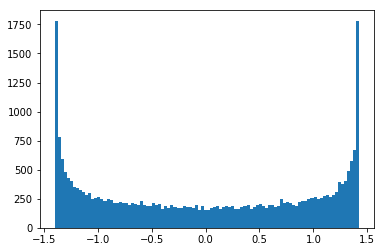

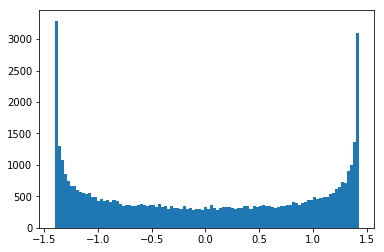

4.381911500317415e-14
0.0


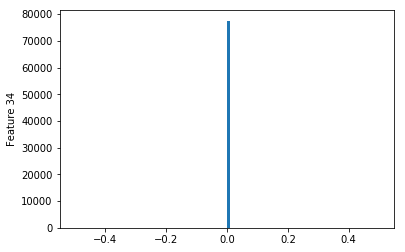

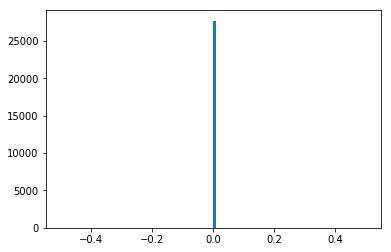

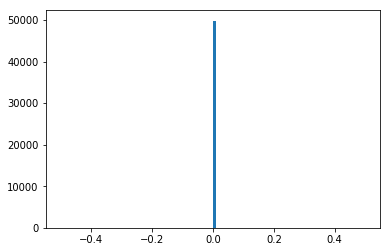

IndexError: index 35 is out of bounds for axis 1 with size 35

In [95]:
def histo(index_feature, yb, data,bins):
    
    data_array = data[:,index_feature]
    data_mask = np.where(yb>0, True, False) # Transforming in a boolean mask
    
    print np.mean(data_array)
    print np.std(data_array)
    
    plt.hist(data_array,bins)
    plt.ylabel("Feature "+str(i))
    plt.figure()
    plt.hist(data_array[data_mask],bins)
    plt.figure()
    plt.hist(data_array[np.invert(data_mask)],bins)
    plt.show()
    
for i in range(36):    
    histo(i,train_list[1], train_list[5],100)

In [115]:
""" 
Générateur renvoyant (en k fois) des données splitées pour train et test
Retourne les données de train puis de test
"""
def K_split_LS(yb,input_data,k):
    n = int(yb.shape[0])
    bool_mask = np.ones(n,dtype=bool)
    bool_mask[::k] = 0
    """On renvoie ... train puis ... test"""
    for i in range(k):
        yield yb[bool_mask], standardize(input_data[bool_mask]), yb[np.invert(bool_mask)], standardize(input_data[np.invert(bool_mask)])
        bool_mask[i::k] = 1
        bool_mask[i+1::k] = 0 
        
def Kfold_ridge(yb, input_data, k,degree,lambda_):

    train_loss_list = []
    test_loss_list = []
    score_list = []
    for yb_train, input_data_train, yb_test, input_data_test, in K_split_LS(yb, input_data,k):
        input_data_train_poly = build_poly(input_data_train,degree)
        input_data_test_poly = build_poly(input_data_test,degree)
        w, train_loss, test_loss, y_pred = ridge(yb_test, input_data_test_poly, yb_train, input_data_train_poly,lambda_)
        train_loss_list+=[train_loss]
        test_loss_list+=[test_loss]
        score_list+=[np.mean(y_pred == yb_test)]
        
    return train_loss_list, test_loss_list,score_list  

def param_test_simultane(yb, input_data, k):
    
    #lambda_list = np.linspace(10,max_lambda,number_lambda)
    lambda_list = np.logspace(-10, 1, 13)
    degree_list = np.arange(4,15)
    
    final_train_loss_list = np.zeros((len(degree_list),len(lambda_list)))
    final_test_loss_list = np.zeros((len(degree_list),len(lambda_list)))
    final_score_list = np.zeros((len(degree_list),len(lambda_list)))

    
    for j,degree in enumerate(degree_list):
        for i, lambda_ in enumerate(lambda_list):
            train_loss_list, test_loss_list,score_list = Kfold_ridge(yb, input_data,k,degree,lambda_)
            train_loss, test_loss, score = np.mean(train_loss_list), np.mean(test_loss_list), np.mean(score_list)
            final_train_loss_list[j,i]=train_loss
            final_test_loss_list[j,i]=test_loss
            final_score_list[j,i]=score
            print ("Degree = " + str(degree) + " and Lambda = " + str(lambda_) + "Score = " + str(score))
    
    """
    plt.legend()
    plt.figure(1)
    #plt.contourf(lambda_list,degree_list, final_train_loss_list, 20, cmap='RdGy')
    plt.pcolor(lambda_list,degree_list, final_train_loss_list)
    plt.colorbar();
    
    plt.ylabel("Train Loss")
    plt.figure(2)
    plt.contourf(lambda_list,degree_list,  final_test_loss_list, 20, cmap='RdGy')
    plt.colorbar();
    plt.ylabel("Test Loss")
    plt.figure(3)
    plt.contourf(lambda_list,degree_list,  final_score_list, 20, cmap='RdGy')
    plt.colorbar();
    plt.ylabel("Score")
    """
    plt.show()
    
    return final_train_loss_list, final_test_loss_list, final_score_list

for i in range(8):
    param_test_simultane(train_list[i], train_list[8+i],6)

Degree = 4 and Lambda = 1e-10Score = 0.6973026168635758
Degree = 4 and Lambda = 8.254041852680173e-10Score = 0.7872746349801584
Degree = 4 and Lambda = 6.812920690579622e-09Score = 0.7988480846715681
Degree = 4 and Lambda = 5.6234132519034905e-08Score = 0.798373774840003
Degree = 4 and Lambda = 4.6415888336127725e-07Score = 0.7985228505704741
Degree = 4 and Lambda = 3.831186849557285e-06Score = 0.798577059927009
Degree = 4 and Lambda = 3.1622776601683795e-05Score = 0.7985906078585195
Degree = 4 and Lambda = 0.0002610157215682533Score = 0.7985228472647568
Degree = 4 and Lambda = 0.002154434690031882Score = 0.798129837143219
Degree = 4 and Lambda = 0.01778279410038923Score = 0.7960157251298335
Degree = 4 and Lambda = 0.14677992676220675Score = 0.7918146134946706
Degree = 4 and Lambda = 1.2115276586285852Score = 0.7733296581690382
Degree = 4 and Lambda = 10.0Score = 0.7240005144930296
Degree = 5 and Lambda = 1e-10Score = 0.5954886642038367
Degree = 5 and Lambda = 8.254041852680173e-10Scor

Degree = 13 and Lambda = 6.812920690579622e-09Score = 0.6412508959100004
Degree = 13 and Lambda = 5.6234132519034905e-08Score = 0.7561315712167455
Degree = 13 and Lambda = 4.6415888336127725e-07Score = 0.7795768446454737
Degree = 13 and Lambda = 3.831186849557285e-06Score = 0.8047566786431924
Degree = 13 and Lambda = 3.1622776601683795e-05Score = 0.8061119158622833
Degree = 13 and Lambda = 0.0002610157215682533Score = 0.8061390469862894
Degree = 13 and Lambda = 0.002154434690031882Score = 0.7533799450054693
Degree = 13 and Lambda = 0.01778279410038923Score = 0.7984956103577961
Degree = 13 and Lambda = 0.14677992676220675Score = 0.7548708720036698
Degree = 13 and Lambda = 1.2115276586285852Score = 0.7620276982264249
Degree = 13 and Lambda = 10.0Score = 0.7413199521245741
Degree = 14 and Lambda = 1e-10Score = 0.5275231556352918
Degree = 14 and Lambda = 8.254041852680173e-10Score = 0.5151092372307181
Degree = 14 and Lambda = 6.812920690579622e-09Score = 0.5963818690255137
Degree = 14 and 

Degree = 11 and Lambda = 4.6415888336127725e-07Score = 0.7931038589984444
Degree = 11 and Lambda = 3.831186849557285e-06Score = 0.7930609798058814
Degree = 11 and Lambda = 3.1622776601683795e-05Score = 0.7929752459238513
Degree = 11 and Lambda = 0.0002610157215682533Score = 0.7928180708155937
Degree = 11 and Lambda = 0.002154434690031882Score = 0.7927752038745784
Degree = 11 and Lambda = 0.01778279410038923Score = 0.7887598729834001
Degree = 11 and Lambda = 0.14677992676220675Score = 0.7730986433184702
Degree = 11 and Lambda = 1.2115276586285852Score = 0.7395043034983247
Degree = 11 and Lambda = 10.0Score = 0.6941784878422107
Degree = 12 and Lambda = 1e-10Score = 0.5142619485230338
Degree = 12 and Lambda = 8.254041852680173e-10Score = 0.5090879777187273
Degree = 12 and Lambda = 6.812920690579622e-09Score = 0.5502116006496417
Degree = 12 and Lambda = 5.6234132519034905e-08Score = 0.7031378843403694
Degree = 12 and Lambda = 4.6415888336127725e-07Score = 0.7890027831988428
Degree = 12 and

Degree = 9 and Lambda = 3.831186849557285e-06Score = 0.828283309155363
Degree = 9 and Lambda = 3.1622776601683795e-05Score = 0.8283254898973215
Degree = 9 and Lambda = 0.0002610157215682533Score = 0.8284730811483533
Degree = 9 and Lambda = 0.002154434690031882Score = 0.8279881213183545
Degree = 9 and Lambda = 0.01778279410038923Score = 0.8245933704986936
Degree = 9 and Lambda = 0.14677992676220675Score = 0.8040145220401511
Degree = 9 and Lambda = 1.2115276586285852Score = 0.7621185220964882
Degree = 9 and Lambda = 10.0Score = 0.72024366720699
Degree = 10 and Lambda = 1e-10Score = 0.6828411953349534
Degree = 10 and Lambda = 8.254041852680173e-10Score = 0.8186266000566785
Degree = 10 and Lambda = 6.812920690579622e-09Score = 0.82676532793693
Degree = 10 and Lambda = 5.6234132519034905e-08Score = 0.8280303394049277
Degree = 10 and Lambda = 4.6415888336127725e-07Score = 0.8279248888837674
Degree = 10 and Lambda = 3.831186849557285e-06Score = 0.8280724881372165
Degree = 10 and Lambda = 3.16

Degree = 7 and Lambda = 3.1622776601683795e-05Score = 0.8044182080161617
Degree = 7 and Lambda = 0.0002610157215682533Score = 0.8044665872854008
Degree = 7 and Lambda = 0.002154434690031882Score = 0.8042732665301164
Degree = 7 and Lambda = 0.01778279410038923Score = 0.8001159868439799
Degree = 7 and Lambda = 0.14677992676220675Score = 0.7766711405571183
Degree = 7 and Lambda = 1.2115276586285852Score = 0.7326823390818563
Degree = 7 and Lambda = 10.0Score = 0.7116549557984558
Degree = 8 and Lambda = 1e-10Score = 0.6909168384761758
Degree = 8 and Lambda = 8.254041852680173e-10Score = 0.7224338289389811
Degree = 8 and Lambda = 6.812920690579622e-09Score = 0.7428818529445222
Degree = 8 and Lambda = 5.6234132519034905e-08Score = 0.796925843807375
Degree = 8 and Lambda = 4.6415888336127725e-07Score = 0.8153428920672807
Degree = 8 and Lambda = 3.831186849557285e-06Score = 0.8150046017799982
Degree = 8 and Lambda = 3.1622776601683795e-05Score = 0.8151979786271889
Degree = 8 and Lambda = 0.0002

Degree = 5 and Lambda = 0.0002610157215682533Score = 0.9485511640168257
Degree = 5 and Lambda = 0.002154434690031882Score = 0.9480152319551248
Degree = 5 and Lambda = 0.01778279410038923Score = 0.9475176404265113
Degree = 5 and Lambda = 0.14677992676220675Score = 0.9465988922118523
Degree = 5 and Lambda = 1.2115276586285852Score = 0.9455270368821506
Degree = 5 and Lambda = 10.0Score = 0.9446083062548921
Degree = 6 and Lambda = 1e-10Score = 0.6482814665063962
Degree = 6 and Lambda = 8.254041852680173e-10Score = 0.7978434188809116
Degree = 6 and Lambda = 6.812920690579622e-09Score = 0.9443786587728785
Degree = 6 and Lambda = 5.6234132519034905e-08Score = 0.948742585283855
Degree = 6 and Lambda = 4.6415888336127725e-07Score = 0.9485894693751122
Degree = 6 and Lambda = 3.831186849557285e-06Score = 0.9488574222154122
Degree = 6 and Lambda = 3.1622776601683795e-05Score = 0.9487808466736404
Degree = 6 and Lambda = 0.0002610157215682533Score = 0.9483597691308971
Degree = 6 and Lambda = 0.00215

Degree = 14 and Lambda = 0.002154434690031882Score = 0.9472496084429091
Degree = 14 and Lambda = 0.01778279410038923Score = 0.9098430806400253
Degree = 14 and Lambda = 0.14677992676220675Score = 0.8553416523144685
Degree = 14 and Lambda = 1.2115276586285852Score = 0.7703916939209817
Degree = 14 and Lambda = 10.0Score = 0.8585096092104232
Degree = 4 and Lambda = 1e-10Score = 0.5616311904971698
Degree = 4 and Lambda = 8.254041852680173e-10Score = 0.7069448115839868
Degree = 4 and Lambda = 6.812920690579622e-09Score = 0.9024040297236174
Degree = 4 and Lambda = 5.6234132519034905e-08Score = 0.9165564199069354
Degree = 4 and Lambda = 4.6415888336127725e-07Score = 0.9172177955683111
Degree = 4 and Lambda = 3.831186849557285e-06Score = 0.9172177955683111
Degree = 4 and Lambda = 3.1622776601683795e-05Score = 0.9172177955683111
Degree = 4 and Lambda = 0.0002610157215682533Score = 0.9174823458328613
Degree = 4 and Lambda = 0.002154434690031882Score = 0.9176146209651365
Degree = 4 and Lambda = 0.

Degree = 12 and Lambda = 0.14677992676220675Score = 0.9128540798643892
Degree = 12 and Lambda = 1.2115276586285852Score = 0.9096800011748466
Degree = 12 and Lambda = 10.0Score = 0.9045225297802618
Degree = 13 and Lambda = 1e-10Score = 0.49643171833893485
Degree = 13 and Lambda = 8.254041852680173e-10Score = 0.5179832290657033
Degree = 13 and Lambda = 6.812920690579622e-09Score = 0.6487523549379219
Degree = 13 and Lambda = 5.6234132519034905e-08Score = 0.8448749417821583
Degree = 13 and Lambda = 4.6415888336127725e-07Score = 0.8893126728178274
Degree = 13 and Lambda = 3.831186849557285e-06Score = 0.886284715666159
Degree = 13 and Lambda = 3.1622776601683795e-05Score = 0.909944761233421
Degree = 13 and Lambda = 0.0002610157215682533Score = 0.9139121760255781
Degree = 13 and Lambda = 0.002154434690031882Score = 0.9100761971895993
Degree = 13 and Lambda = 0.01778279410038923Score = 0.9129870892757491
Degree = 13 and Lambda = 0.14677992676220675Score = 0.9087537605578843
Degree = 13 and Lam

Degree = 10 and Lambda = 10.0Score = 0.8780487804878051
Degree = 11 and Lambda = 1e-10Score = 0.5315040650406505
Degree = 11 and Lambda = 8.254041852680173e-10Score = 0.5599593495934959
Degree = 11 and Lambda = 6.812920690579622e-09Score = 0.6368563685636857
Degree = 11 and Lambda = 5.6234132519034905e-08Score = 0.7682926829268294
Degree = 11 and Lambda = 4.6415888336127725e-07Score = 0.853319783197832
Degree = 11 and Lambda = 3.831186849557285e-06Score = 0.8702574525745258
Degree = 11 and Lambda = 3.1622776601683795e-05Score = 0.8827913279132792
Degree = 11 and Lambda = 0.0002610157215682533Score = 0.885840108401084
Degree = 11 and Lambda = 0.002154434690031882Score = 0.8899051490514904
Degree = 11 and Lambda = 0.01778279410038923Score = 0.8953252032520326
Degree = 11 and Lambda = 0.14677992676220675Score = 0.8919376693766937
Degree = 11 and Lambda = 1.2115276586285852Score = 0.8868563685636857
Degree = 11 and Lambda = 10.0Score = 0.8753387533875339
Degree = 12 and Lambda = 1e-10Score

Degree = 9 and Lambda = 8.254041852680173e-10Score = 0.6554644898675707
Degree = 9 and Lambda = 6.812920690579622e-09Score = 0.6744237077998311
Degree = 9 and Lambda = 5.6234132519034905e-08Score = 0.7542296171949574
Degree = 9 and Lambda = 4.6415888336127725e-07Score = 0.8808767541116707
Degree = 9 and Lambda = 3.831186849557285e-06Score = 0.887649078919939
Degree = 9 and Lambda = 3.1622776601683795e-05Score = 0.8984727296665679
Degree = 9 and Lambda = 0.0002610157215682533Score = 0.9032043053224054
Degree = 9 and Lambda = 0.002154434690031882Score = 0.9106513939633324
Degree = 9 and Lambda = 0.01778279410038923Score = 0.9214585870555062
Degree = 9 and Lambda = 0.14677992676220675Score = 0.9167242684572594
Degree = 9 and Lambda = 1.2115276586285852Score = 0.917399032289918
Degree = 9 and Lambda = 10.0Score = 0.9194370384999396
Degree = 10 and Lambda = 1e-10Score = 0.507781727614847
Degree = 10 and Lambda = 8.254041852680173e-10Score = 0.5524697453452267
Degree = 10 and Lambda = 6.8129

In [123]:
def submission_ridge_4split(deg_list, lambda_list,train_path,test_path):
    
    #train_array, test_array = preparing_features(train_path, test_path)
    number_splits = len(train_array)/3
    ids_final = np.array([])
    y_pred_final = np.array([])
    for i in range(number_splits):
        
        degree = deg_list[i]
        lambda_ = lambda_list[i]
        poly = build_poly(train_array[number_splits+i],degree)
        poly_test = build_poly(test_array[number_splits+i],degree)
        
        w, train_loss, test_loss, y_pred = ridge(test_array[i], poly_test, train_array[i], poly, lambda_)
        ids_final = np.append(ids_final,test_array[2*number_splits+i])
        y_pred_final = np.append(y_pred_final,y_pred)
    
    create_csv_submission(ids_final, y_pred_final, "pred_4split.csv")
    
submission_ridge_4split([13,13,12,12,8,8,5,6,5],[0.0002610157215682533,0.0002610157215682533,0.002154434690031882,0.0002610157215682533,3.1622776601683795e-05,0.002154434690031882,0.0002610157215682533,0.0002610157215682533],"train.csv","test.csv") 

In [65]:
print max(train_list[5][:,27])

1.3877787807814457e-17


In [81]:
print train_list[5].shape

(77544L, 26L)
